# Causal Impact of SNL Appearance on Wikipedia Page Views
In this notebook measurements are made of the causal impact of a musician's <a href="https://en.wikipedia.org/wiki/Saturday_Night_Live_(season_41)">Saturday Night Live</a> appearance on their Wikipeda page view time series.

Causal impact is modeled using Google's [Causal Impact](https://google.github.io/CausalImpact/) R package which implements the algorithms described in the publication [Inferring Causal Impact Using Bayesian Structural Time-Series Models](http://research.google.com/pubs/pub41854.html).  

The model is trained using time series of Wikipedia page views for both the musician who appeared on SNL and musicians with similar music. Musicians with similar music were identified using [Music-Map](http://www.music-map.com/disclosure.html). The resulting model predicts the counterfactual time series.  That is, the time series for the musician with an SNL appearance that would have resulted had they not performed on *Saturday Night Live*.  By considering the difference between the actual time series and the counterfactual one, the causal impact can be determined.

Time series of Wikipedia page views are obtained using the [pageviews](https://github.com/Ironholds/pageviews) R package. 

In this example, the causual impact for musicians [Disclosure](http://www.disclosureofficial.com/moog-for-love) and [Sia](http://siamusic.net/) are measured.  These two musicians were chosen, because their appearance on SNL resulted in differrent levels of Wikipedia page views.  Disclosure had the typical approximately 40,000 increase in single day page views, whereas Sia's increase was around 10,000 page views.

## Load Libraries
Load the `CausalImpact` and `pageviews` packages.

In [12]:
library(CausalImpact)
library(pageviews)

## Retrieve pageview counts
Page view counts are retrieved for a range of dates, starting before an SNL appearance and ending seven days after the appearance.  The end date was chosen to include the majority of the increase in page views.

In [13]:
disclosure_y_pageviews <- article_pageviews(article = "Disclosure_(band)", start = "2015100100", end = "2015112100")
disclosure_x1_pageviews <- article_pageviews(article = "Rudimental", start = "2015100100", end = "2015112100")
disclosure_x2_pageviews <- article_pageviews(article = "Bondax", start = "2015100100", end = "2015112100")
disclosure_x3_pageviews <- article_pageviews(article = "Flume (musician)", start = "2015100100", end = "2015112100")

sia_y_pageviews <- article_pageviews(article = "Sia", start = "2015100100", end = "2015111400")
sia_x1_pageviews <- article_pageviews(article = "Dragonette", start = "2015100100", end = "2015111400")
sia_x2_pageviews <- article_pageviews(article = "PJ Harvey", start = "2015100100", end = "2015111400")
sia_x3_pageviews <- article_pageviews(article = "Serena Ryder", start = "2015100100", end = "2015111400")

sia_y_pageviews[1,]

    project language article     access      agent granularity       date views
1 wikipedia       en     Sia all-access all-agents       daily 2015-10-01   678

## Create Data Set
From the dataframes above, create data sets of time series consisting of the response variable `y` and predictors `x(i)`.

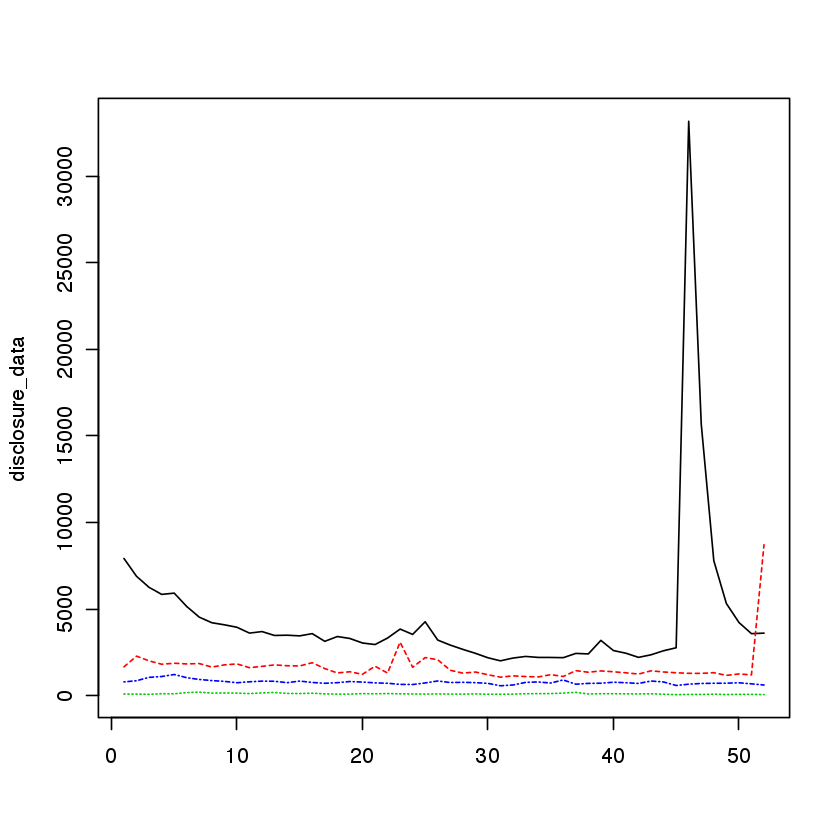

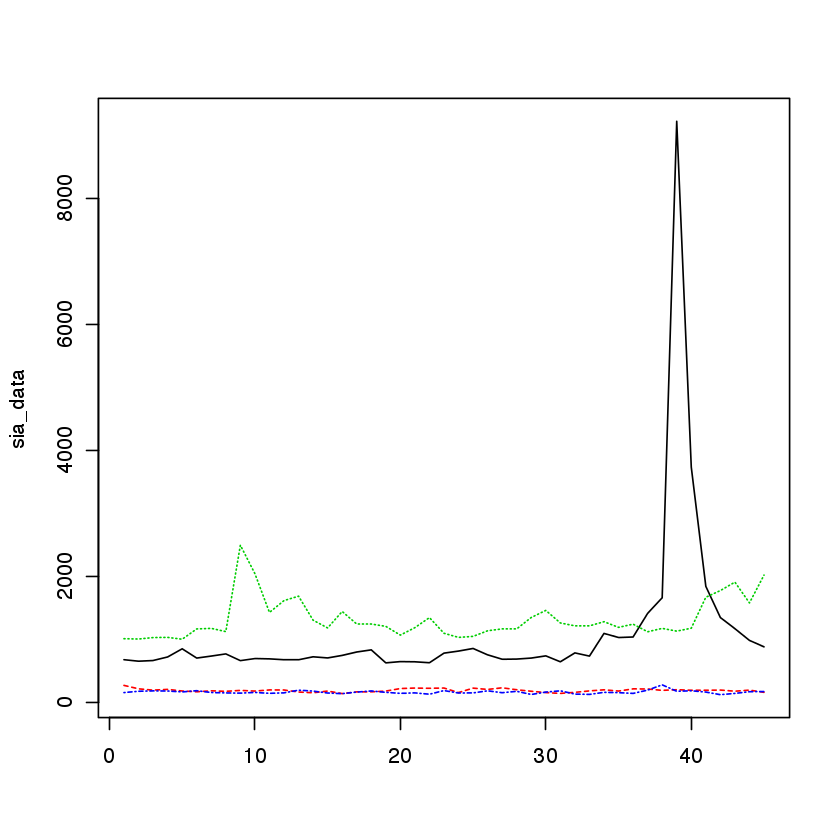

In [14]:
time.points <- seq.Date(as.Date("2015-10-01"), by = 1, length.out = nrow(disclosure_y_pageviews))
disclosure_data <- zoo(cbind(disclosure_y_pageviews["views"], disclosure_x1_pageviews["views"],
                             disclosure_x2_pageviews["views"], disclosure_x3_pageviews["views"]), time.points)
colnames(disclosure_data) <- c("y", "x1", "x2", "x3")
matplot(disclosure_data, type = "l")

time.points <- seq.Date(as.Date("2015-10-01"), by = 1, length.out = nrow(sia_y_pageviews))
sia_data <- zoo(cbind(sia_y_pageviews["views"], sia_x1_pageviews["views"], sia_x2_pageviews["views"], 
                      sia_x3_pageviews["views"]), time.points)
colnames(sia_data) <- c("y", "x1", "x2", "x3")
matplot(sia_data, type = "l")


## Construct Time Series Model
Time series are constructed for intervention periods of one and zero days.

In [15]:
pre.period <- as.Date(c("2015-10-01", "2015-11-14"))
post.period <- as.Date(c("2015-11-16", "2015-11-21"))
disclosure_impact1 <- CausalImpact(disclosure_data, pre.period, post.period)

pre.period <- as.Date(c("2015-10-01", "2015-11-13"))
post.period <- as.Date(c("2015-11-14", "2015-11-21"))
disclosure_impact2 <- CausalImpact(disclosure_data, pre.period, post.period)

pre.period <- as.Date(c("2015-10-01", "2015-11-07"))
post.period <- as.Date(c("2015-11-09", "2015-11-14"))
sia_impact1 <- CausalImpact(sia_data, pre.period, post.period)

pre.period <- as.Date(c("2015-10-01", "2015-11-06"))
post.period <- as.Date(c("2015-11-07", "2015-11-14"))
sia_impact2 <- CausalImpact(sia_data, pre.period, post.period)

## Plot Results

The results of the model are visualized in three panels.  The first one shows the actual page views for the musician and the counterfactual predition.  The second panel displays the difference between the actual and counterfactual.  The last panel is the cumulative increase in views of the musicians article as a result of their appearance on *Saturday Night Live*.

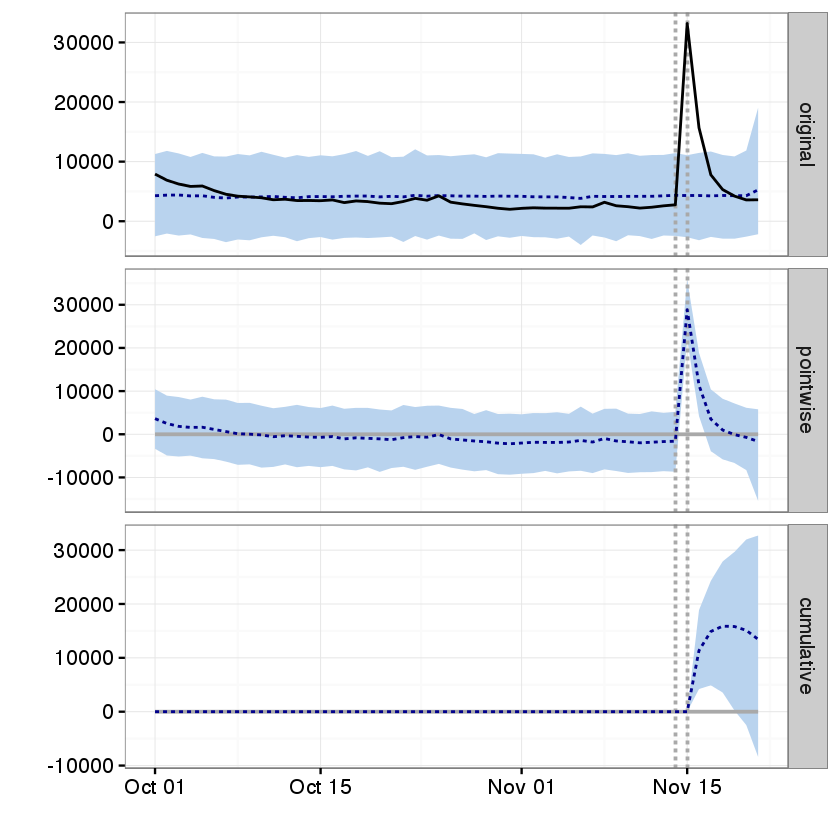

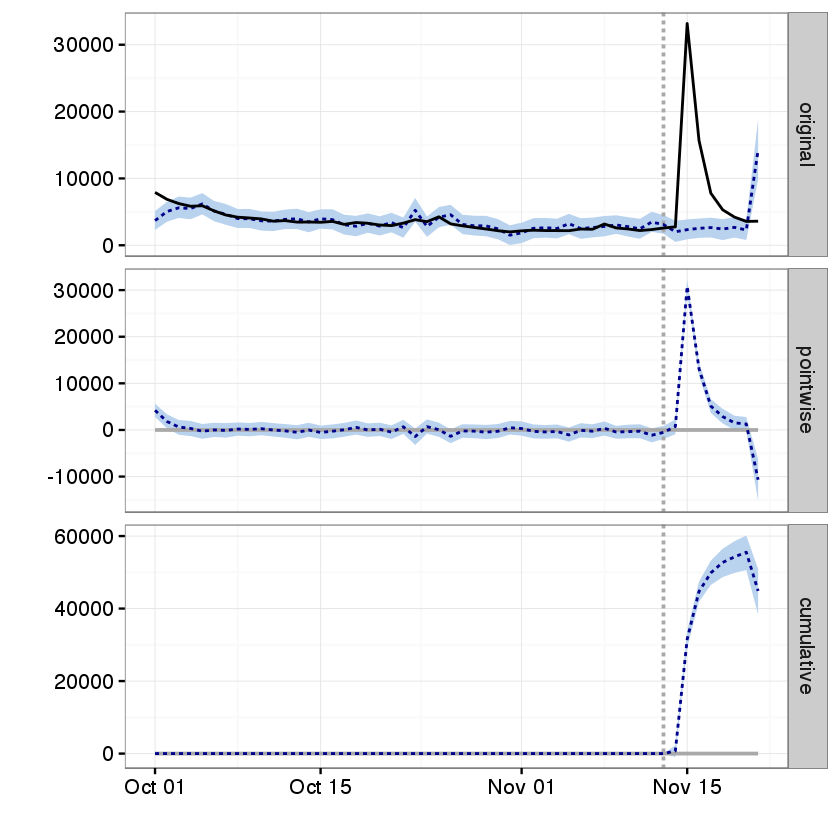

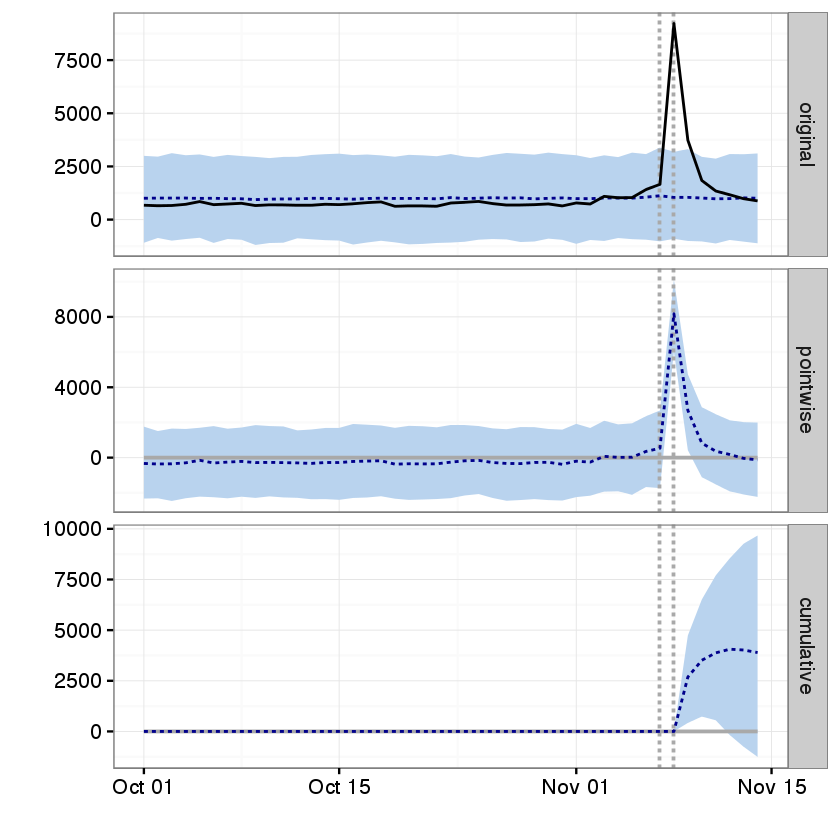

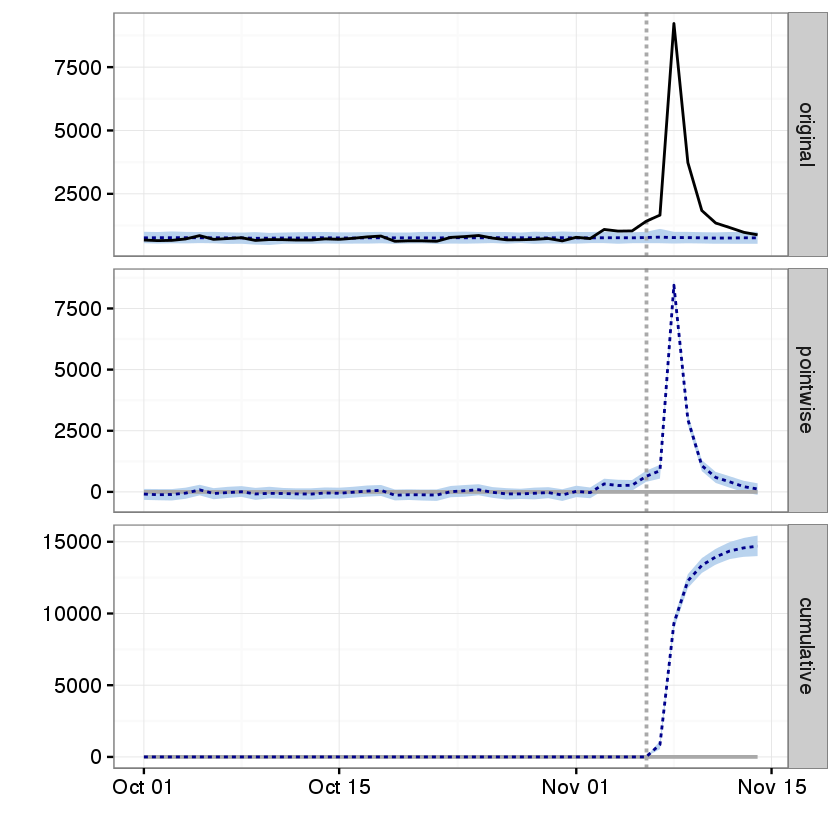

In [19]:
options(warn=-1) # suppress warnings from geom_path about missing row values
plot(disclosure_impact1)
plot(disclosure_impact2)
plot(sia_impact1)
plot(sia_impact2)
options(warn=0) # restore warnings

## Summary Reports

In [17]:
summary(disclosure_impact1)
summary(disclosure_impact1,"report")
disclosure_impact1$summary

summary(disclosure_impact2)
summary(disclosure_impact2,"report")
disclosure_impact2$summary

summary(sia_impact1)
summary(sia_impact1,"report")
sia_impact1$summary

summary(sia_impact2)
summary(sia_impact2,"report")
sia_impact2$summary

Posterior inference {CausalImpact}

                         Average         Cumulative    
Actual                   6700            40198         
Prediction (s.d.)        4459 (1650)     26753 (9900)  
95% CI                   [1248, 8099]    [7488, 48595] 
                                                       
Absolute effect (s.d.)   2241 (1650)     13445 (9900)  
95% CI                   [-1399, 5452]   [-8397, 32710]
                                                       
Relative effect (s.d.)   50% (37%)       50% (37%)     
95% CI                   [-31%, 122%]    [-31%, 122%]  

Posterior tail-area probability p:   0.079
Posterior prob. of a causal effect:  92%

For more details, type: summary(impact, "report")

Analysis report {CausalImpact}


During the post-intervention period, the response variable had an average value of approx. 6.7K. In the absence of an intervention, we would have expected an average response of 4.46K. The 95% interval of this counterfactual predictio

,Actual,Pred,Pred.lower,Pred.upper,Pred.sd,AbsEffect,AbsEffect.lower,AbsEffect.upper,AbsEffect.sd,RelEffect,RelEffect.lower,RelEffect.upper,RelEffect.sd,alpha,p
Average,6699.6666667,4458.8132857,1247.9505152,8099.1318224,1649.9794347,2240.8533809,-1399.4651557,5451.7161514,1649.9794347,0.5025672,-0.3138649,1.2226832,0.3700490,0.0500000,0.0790000
Cumulative,40198.0000000,26752.8797144,7487.7030914,48594.7909342,9899.8766081,13445.1202856,-8396.7909342,32710.2969086,9899.8766081,0.5025672,-0.3138649,1.2226832,0.3700490,0.0500000,0.0790000


Posterior inference {CausalImpact}

                         Average        Cumulative    
Actual                   9517           76135         
Prediction (s.d.)        3907 (404)     31257 (3235)  
95% CI                   [3152, 4727]   [25218, 37817]
                                                      
Absolute effect (s.d.)   5610 (404)     44878 (3235)  
95% CI                   [4790, 6365]   [38318, 50917]
                                                      
Relative effect (s.d.)   144% (10%)     144% (10%)    
95% CI                   [123%, 163%]   [123%, 163%]  

Posterior tail-area probability p:   0.001
Posterior prob. of a causal effect:  99.9%

For more details, type: summary(impact, "report")

Analysis report {CausalImpact}


During the post-intervention period, the response variable had an average value of approx. 9.52K. By contrast, in the absence of an intervention, we would have expected an average response of 3.91K. The 95% interval of this counterfactual pre

,Actual,Pred,Pred.lower,Pred.upper,Pred.sd,AbsEffect,AbsEffect.lower,AbsEffect.upper,AbsEffect.sd,RelEffect,RelEffect.lower,RelEffect.upper,RelEffect.sd,alpha,p
Average,9516.875000,3907.095172,3152.253124,4727.159489,404.392280,5609.779828,4789.715511,6364.621876,404.392280,1.435793,1.225902,1.628991,0.103502,0.050000,0.001000
Cumulative,76135.000000,31256.761378,25218.024995,37817.275916,3235.138240,44878.238622,38317.724084,50916.975005,3235.138240,1.435793,1.225902,1.628991,0.103502,0.050000,0.001000


Posterior inference {CausalImpact}

                         Average        Cumulative   
Actual                   1660           9959         
Prediction (s.d.)        1010 (458)     6063 (2750)  
95% CI                   [48, 1870]     [288, 11217] 
                                                     
Absolute effect (s.d.)   649 (458)      3896 (2750)  
95% CI                   [-210, 1612]   [-1258, 9671]
                                                     
Relative effect (s.d.)   64% (45%)      64% (45%)    
95% CI                   [-21%, 160%]   [-21%, 160%] 

Posterior tail-area probability p:   0.071
Posterior prob. of a causal effect:  93%

For more details, type: summary(impact, "report")

Analysis report {CausalImpact}


During the post-intervention period, the response variable had an average value of approx. 1.66K. In the absence of an intervention, we would have expected an average response of 1.01K. The 95% interval of this counterfactual prediction is [0.05K, 1.87K]

,Actual,Pred,Pred.lower,Pred.upper,Pred.sd,AbsEffect,AbsEffect.lower,AbsEffect.upper,AbsEffect.sd,RelEffect,RelEffect.lower,RelEffect.upper,RelEffect.sd,alpha,p
Average,1659.8333333,1010.4317987,48.0079222,1869.5126431,458.3453175,649.4015346,-209.6793098,1611.8254111,458.3453175,0.6426970,-0.2075146,1.5951848,0.4536133,0.0500000,0.0710000
Cumulative,9959.0000000,6062.5907923,288.0475332,11217.0758585,2750.0719053,3896.4092077,-1258.0758585,9670.9524668,2750.0719053,0.6426970,-0.2075146,1.5951848,0.4536133,0.0500000,0.0710000


Posterior inference {CausalImpact}

                         Average        Cumulative    
Actual                   2605           20841         
Prediction (s.d.)        768 (48)       6145 (381)    
95% CI                   [676, 855]     [5405, 6839]  
                                                      
Absolute effect (s.d.)   1837 (48)      14696 (381)   
95% CI                   [1750, 1930]   [14002, 15436]
                                                      
Relative effect (s.d.)   239% (6.2%)    239% (6.2%)   
95% CI                   [228%, 251%]   [228%, 251%]  

Posterior tail-area probability p:   0.001
Posterior prob. of a causal effect:  99.9%

For more details, type: summary(impact, "report")

Analysis report {CausalImpact}


During the post-intervention period, the response variable had an average value of approx. 2.61K. By contrast, in the absence of an intervention, we would have expected an average response of 0.77K. The 95% interval of this counterfactual pre

,Actual,Pred,Pred.lower,Pred.upper,Pred.sd,AbsEffect,AbsEffect.lower,AbsEffect.upper,AbsEffect.sd,RelEffect,RelEffect.lower,RelEffect.upper,RelEffect.sd,alpha,p
Average,2.605125e+03,7.681270e+02,6.756038e+02,8.549140e+02,4.756555e+01,1.836998e+03,1.750211e+03,1.929521e+03,4.756555e+01,2.391529e+00,2.278544e+00,2.511982e+00,6.192407e-02,5.000000e-02,1.000000e-03
Cumulative,2.084100e+04,6.145016e+03,5.404830e+03,6.839312e+03,3.805244e+02,1.469598e+04,1.400169e+04,1.543617e+04,3.805244e+02,2.391529e+00,2.278544e+00,2.511982e+00,6.192407e-02,5.000000e-02,1.000000e-03
